In [1]:
import czone as cz
import numpy as np

In [2]:
box = cz.volume.makeRectPrism(5,5,10)
sc_gen = cz.generator.BasicStructure()
H_volume = cz.volume.Volume(points=box, generator=sc_gen)

He_volume = cz.volume.from_volume(H_volume, translate=np.array([10,0,0]))
He_volume.generator.species = [2]

R = cz.transform.rot_v(np.array([0.0,0.0,1.0]), np.pi/4)
He_volume_r = cz.volume.from_volume(He_volume, translate=np.array([0,10,0]), rotate=R)

In [3]:
bounds = np.array([[0.0,0.0,0.0], [20.0, 20.0, 20.0]])
simple_scene = cz.scene.Scene(bounds=bounds, objects=[H_volume, He_volume, He_volume_r])

In [4]:
simple_scene.populate()

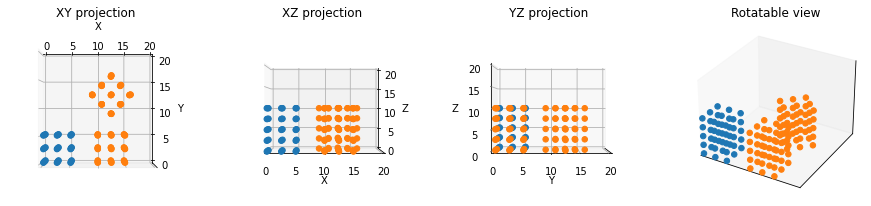

In [5]:
cz.viz.simple_scene_view(simple_scene)

In [6]:
cz.viz.simple_scene_widget(simple_scene)

interactive(children=(FloatSlider(value=-60.0, description='Azimuth', layout=Layout(height='30px', width='400p…

<function czone.viz.viz.simple_scene_view_with_rotate(scene, azim=-60, elev=30)>

In [10]:
radius = 30.0
bounds = np.array([[-1,-1,0],[1,1,0.5]])*1.2*radius
N_blocks = 12
translations = np.zeros((N_blocks,3))
angle = 2*np.pi/N_blocks
base_volume = cz.volume.Volume(points=box, generator=sc_gen)
base_volume.translate(np.array([-1.0,-1.0,0.0])*np.array(base_volume.centroid))
vol_list = []
for i in range(N_blocks):
    t_vec = np.array([radius*np.cos(i*angle), radius*np.sin(i*angle), 0.0])
    R = cz.transform.rot_v(np.array([0.0,0.0,1.0]), -i*angle)
    t_vol = cz.volume.from_volume(base_volume, translate=t_vec, rotate=R)
    t_vol.generator.species = [i]
    vol_list.append(t_vol)
    
stonehenge = cz.scene.Scene(bounds=bounds, objects=vol_list)
stonehenge.populate()

In [11]:
cz.viz.simple_scene_widget(stonehenge)

interactive(children=(FloatSlider(value=-60.0, description='Azimuth', layout=Layout(height='30px', width='400p…

<function czone.viz.viz.simple_scene_view_with_rotate(scene, azim=-60, elev=30)>